## Import Required Libraries

In [38]:
import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings("ignore")
import datetime
import math
from prophet import Prophet


## Import the CSV Data

In [39]:
#df_all = pd.read_csv('C:/Users/priygupta/BYOP/CPG_Master_data_Set.csv', index_col=3)
df_all = pd.read_csv('C:/Users/priygupta/BYOP/CPG_Master_data_Set.csv')
print(df_all.head())

   Invoice  Product_Code  Quantity InvoiceDate InvoiceDate_timeStamp  Price  \
0    89058       7259395         3  20-04-2019      20-04-2019 06:02     62   
1    89058         10557         5  20-04-2019      20-04-2019 06:02     37   
2    89058       2733507         3  20-04-2019      20-04-2019 06:02     48   
3    89058       5200349         5  20-04-2019      20-04-2019 06:02    100   
4    89058        715497         3  20-04-2019      20-04-2019 06:02     91   

   Customer_ID Country  Pack_Size_Code  In_Store_Promotion_Flag  \
0        38055     USA               3                        0   
1        38055     USA               3                        1   
2        38055     USA               1                        1   
3        38055     USA               4                        1   
4        38055     USA               2                        1   

   Online_Promotion_Flag  Shelf_Space_Code  
0                      0                 3  
1                      0        

## Format the date 

In [40]:
df_all['InvoiceDate'] = pd.to_datetime(df_all['InvoiceDate'],
                          format='%d-%m-%Y')
#df_all = df_all.sort_index(ascending=True)
print(df_all.head()) 

   Invoice  Product_Code  Quantity InvoiceDate InvoiceDate_timeStamp  Price  \
0    89058       7259395         3  2019-04-20      20-04-2019 06:02     62   
1    89058         10557         5  2019-04-20      20-04-2019 06:02     37   
2    89058       2733507         3  2019-04-20      20-04-2019 06:02     48   
3    89058       5200349         5  2019-04-20      20-04-2019 06:02    100   
4    89058        715497         3  2019-04-20      20-04-2019 06:02     91   

   Customer_ID Country  Pack_Size_Code  In_Store_Promotion_Flag  \
0        38055     USA               3                        0   
1        38055     USA               3                        1   
2        38055     USA               1                        1   
3        38055     USA               4                        1   
4        38055     USA               2                        1   

   Online_Promotion_Flag  Shelf_Space_Code  
0                      0                 3  
1                      0        

## Create a revenue column

In [43]:
df_all['Revenue'] = df_all['Price'] * df_all['Quantity']
print(df_all.head())

   Invoice  Product_Code  Quantity InvoiceDate InvoiceDate_timeStamp  Price  \
0    89058       7259395         3  2019-04-20      20-04-2019 06:02     62   
1    89058         10557         5  2019-04-20      20-04-2019 06:02     37   
2    89058       2733507         3  2019-04-20      20-04-2019 06:02     48   
3    89058       5200349         5  2019-04-20      20-04-2019 06:02    100   
4    89058        715497         3  2019-04-20      20-04-2019 06:02     91   

   Customer_ID Country  Pack_Size_Code  In_Store_Promotion_Flag  \
0        38055     USA               3                        0   
1        38055     USA               3                        1   
2        38055     USA               1                        1   
3        38055     USA               4                        1   
4        38055     USA               2                        1   

   Online_Promotion_Flag  Shelf_Space_Code  Revenue  
0                      0                 3      186  
1             

## Data Descriptions  

In [5]:
df_all.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803000 entries, 0 to 802999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Invoice                  803000 non-null  int64         
 1   Product_Code             803000 non-null  int64         
 2   Quantity                 803000 non-null  int64         
 3   InvoiceDate              803000 non-null  datetime64[ns]
 4   InvoiceDate_timeStamp    803000 non-null  object        
 5   Price                    803000 non-null  int64         
 6   Customer_ID              803000 non-null  int64         
 7   Country                  803000 non-null  object        
 8   Pack_Size_Code           803000 non-null  int64         
 9   In_Store_Promotion_Flag  803000 non-null  int64         
 10  Online_Promotion_Flag    803000 non-null  int64         
 11  Shelf_Space_Code         803000 non-null  int64         
 12  Revenue         

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Invoice,803000.0,NaN,NaN,NaN,NaT,NaT,54833.860039,26012.613808,10001.0,32284.0,54635.0,77281.0,99998.0
Product_Code,803000.0,NaN,NaN,NaN,NaT,NaT,1887418.878384,2535254.119949,10557.0,73186.0,669238.0,3611064.0,8991517.0
Quantity,803000.0,NaN,NaN,NaN,NaT,NaT,3.501186,1.381731,1.0,3.0,4.0,4.0,6.0
InvoiceDate,803000,1325,2022-11-16 00:00:00,1882,2019-04-20,2022-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate_timeStamp,803000,32350,22-09-2021 02:52,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,803000.0,NaN,NaN,NaN,NaT,NaT,51.398333,29.440525,2.0,23.0,55.0,78.0,100.0
Customer_ID,803000.0,NaN,NaN,NaN,NaT,NaT,54227.347229,26305.655558,10125.0,31027.0,53618.0,77549.0,99988.0
Country,803000,1,USA,803000,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pack_Size_Code,803000.0,NaN,NaN,NaN,NaT,NaT,2.50002,1.117259,1.0,2.0,2.0,3.0,4.0
In_Store_Promotion_Flag,803000.0,NaN,NaN,NaN,NaT,NaT,0.499416,0.5,0.0,0.0,0.0,1.0,1.0


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803000 entries, 0 to 802999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Invoice                  803000 non-null  int64         
 1   Product_Code             803000 non-null  int64         
 2   Quantity                 803000 non-null  int64         
 3   InvoiceDate              803000 non-null  datetime64[ns]
 4   InvoiceDate_timeStamp    803000 non-null  object        
 5   Price                    803000 non-null  int64         
 6   Customer_ID              803000 non-null  int64         
 7   Country                  803000 non-null  object        
 8   Pack_Size_Code           803000 non-null  int64         
 9   In_Store_Promotion_Flag  803000 non-null  int64         
 10  Online_Promotion_Flag    803000 non-null  int64         
 11  Shelf_Space_Code         803000 non-null  int64         
 12  Revenue         

In [6]:
df_all.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Invoice,803000.0,NaN,NaN,NaN,NaT,NaT,54833.860039,26012.613808,10001.0,32284.0,54635.0,77281.0,99998.0
Product_Code,803000.0,NaN,NaN,NaN,NaT,NaT,1887418.878384,2535254.119949,10557.0,73186.0,669238.0,3611064.0,8991517.0
Quantity,803000.0,NaN,NaN,NaN,NaT,NaT,3.501186,1.381731,1.0,3.0,4.0,4.0,6.0
InvoiceDate,803000,1325,2022-11-16 00:00:00,1882,2019-04-20,2022-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate_timeStamp,803000,32350,22-09-2021 02:52,140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,803000.0,NaN,NaN,NaN,NaT,NaT,51.398333,29.440525,2.0,23.0,55.0,78.0,100.0
Customer_ID,803000.0,NaN,NaN,NaN,NaT,NaT,54227.347229,26305.655558,10125.0,31027.0,53618.0,77549.0,99988.0
Country,803000,1,USA,803000,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pack_Size_Code,803000.0,NaN,NaN,NaN,NaT,NaT,2.50002,1.117259,1.0,2.0,2.0,3.0,4.0
In_Store_Promotion_Flag,803000.0,NaN,NaN,NaN,NaT,NaT,0.499416,0.5,0.0,0.0,0.0,1.0,1.0


## Remove Columns with Null data

In [7]:
df_all = df_all.dropna(axis=0)
print(df_all.head())

   Invoice  Product_Code  Quantity InvoiceDate InvoiceDate_timeStamp  Price  \
0    89058       7259395         3  2019-04-20      20-04-2019 06:02     62   
1    89058         10557         5  2019-04-20      20-04-2019 06:02     37   
2    89058       2733507         3  2019-04-20      20-04-2019 06:02     48   
3    89058       5200349         5  2019-04-20      20-04-2019 06:02    100   
4    89058        715497         3  2019-04-20      20-04-2019 06:02     91   

   Customer_ID Country  Pack_Size_Code  In_Store_Promotion_Flag  \
0        38055     USA               3                        0   
1        38055     USA               3                        1   
2        38055     USA               1                        1   
3        38055     USA               4                        1   
4        38055     USA               2                        1   

   Online_Promotion_Flag  Shelf_Space_Code  Revenue  
0                      0                 3      186  
1             

## One Hot Encoding

In [47]:
df_all_one_hot_encoded = pd.get_dummies(df_all, columns = ['Pack_Size_Code','Shelf_Space_Code'])
print(df_all_one_hot_encoded.head())

   Invoice  Product_Code  Quantity InvoiceDate InvoiceDate_timeStamp  Price  \
0    89058       7259395         3  2019-04-20      20-04-2019 06:02     62   
1    89058         10557         5  2019-04-20      20-04-2019 06:02     37   
2    89058       2733507         3  2019-04-20      20-04-2019 06:02     48   
3    89058       5200349         5  2019-04-20      20-04-2019 06:02    100   
4    89058        715497         3  2019-04-20      20-04-2019 06:02     91   

   Customer_ID Country  In_Store_Promotion_Flag  Online_Promotion_Flag  \
0        38055     USA                        0                      0   
1        38055     USA                        1                      0   
2        38055     USA                        1                      0   
3        38055     USA                        1                      1   
4        38055     USA                        1                      1   

   Revenue  Pack_Size_Code_1  Pack_Size_Code_2  Pack_Size_Code_3  \
0      186  

## Aggregate the data at Invoice Date

In [48]:
df_all_aggregate = df_all_one_hot_encoded.groupby('InvoiceDate')[['Revenue','Price','Quantity','In_Store_Promotion_Flag','Online_Promotion_Flag','Pack_Size_Code_1','Pack_Size_Code_2','Pack_Size_Code_3','Pack_Size_Code_4','Shelf_Space_Code_1','Shelf_Space_Code_2','Shelf_Space_Code_3']].sum()
df_all_aggregate.reset_index(inplace=True)
print(df_all_aggregate.tail())

     InvoiceDate  Revenue  Price  Quantity  In_Store_Promotion_Flag  \
1320  2022-11-30   230929  66041      4370                      635   
1321  2022-12-01   175264  49482      3316                      440   
1322  2022-12-02   304611  85745      5760                      832   
1323  2022-12-03   195378  54534      3702                      509   
1324  2022-12-04   280438  79105      5356                      763   

      Online_Promotion_Flag  Pack_Size_Code_1  Pack_Size_Code_2  \
1320                    617             316.0             315.0   
1321                    473             219.0             231.0   
1322                    826             421.0             420.0   
1323                    513             275.0             272.0   
1324                    795             393.0             372.0   

      Pack_Size_Code_3  Pack_Size_Code_4  Shelf_Space_Code_1  \
1320             324.0             306.0               429.0   
1321             259.0             229.0  

## Calculate the count metrics  

In [49]:
df_all_count_metric= df_all.groupby('InvoiceDate')[['Product_Code','Customer_ID']].nunique()
df_all_count_metric.reset_index(inplace=True)
print(df_all_count_metric.tail())

     InvoiceDate  Product_Code  Customer_ID
1320  2022-11-30            40           67
1321  2022-12-01            40           50
1322  2022-12-02            40           76
1323  2022-12-03            40           49
1324  2022-12-04            40           73


In [15]:
print(df_all_count_metric['Product_Code'].unique())

[40 39 36 38]


Remove product as there are only 4 unique valuues

In [50]:
df_all_count_metric = df_all_count_metric.drop(columns=['Product_Code'])
print(df_all_count_metric)

     InvoiceDate  Customer_ID
0     2019-04-20            7
1     2019-04-21           26
2     2019-04-22           18
3     2019-04-23           23
4     2019-04-24           13
...          ...          ...
1320  2022-11-30           67
1321  2022-12-01           50
1322  2022-12-02           76
1323  2022-12-03           49
1324  2022-12-04           73

[1325 rows x 2 columns]


Merge the Aggreate dataframes

In [51]:
df_all_merge = pd.merge(left =df_all_aggregate,right = df_all_count_metric, how = 'left', left_on = 'InvoiceDate',right_on = 'InvoiceDate')
print(df_all_merge.head())

  InvoiceDate  Revenue  Price  Quantity  In_Store_Promotion_Flag  \
0  2019-04-20    23330   6818       442                       64   
1  2019-04-21    96254  27310      1873                      283   
2  2019-04-22    73025  20249      1418                      210   
3  2019-04-23    89384  25137      1704                      241   
4  2019-04-24    49600  13350       937                      120   

   Online_Promotion_Flag  Pack_Size_Code_1  Pack_Size_Code_2  \
0                     65              31.0              41.0   
1                    273             134.0             147.0   
2                    183              95.0             100.0   
3                    234             142.0             108.0   
4                    135              65.0              58.0   

   Pack_Size_Code_3  Pack_Size_Code_4  Shelf_Space_Code_1  Shelf_Space_Code_2  \
0              39.0              21.0                43.0                49.0   
1             132.0             127.0       

## Analyse the distribution of Revenue using histogram

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

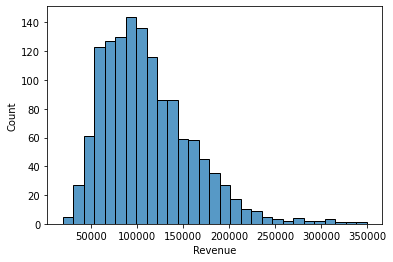

In [52]:
sns.histplot(data=df_all_merge, x='Revenue')

## Kernel Density Estimation, or KDE, visualizes the distribution of data over a continuous interval

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

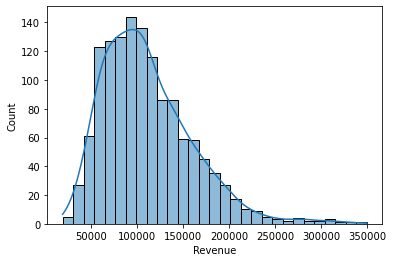

In [21]:
sns.histplot(data=df_all_merge, x='Revenue', kde=True)

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

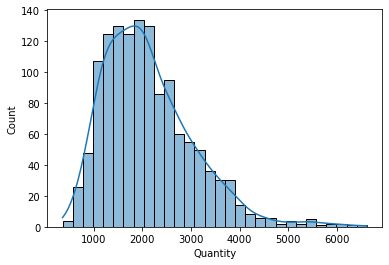

In [23]:
sns.histplot(data=df_all_merge, x='Quantity', kde=True)

<AxesSubplot:xlabel='Customer_ID', ylabel='Count'>

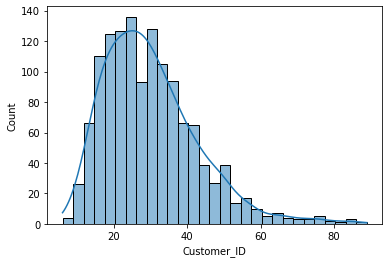

In [24]:
#Customer_ID  
sns.histplot(data=df_all_merge, x='Customer_ID', kde=True)


## Lineplot
Live Plot since we are using time series analysis


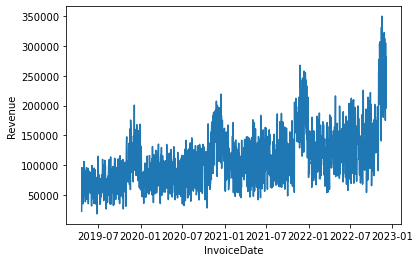

In [26]:

# creating a line plot
sns.lineplot(data = df_all_merge , x = 'InvoiceDate' , y = 'Revenue',ci = False);

## Scatterplot 

To Identify the relationship between Revenue and Distint Customers 

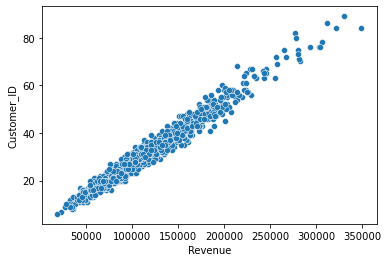

In [27]:
sns.scatterplot(data=df_all_merge, x='Revenue', y='Customer_ID');

## Revenue is directly promotional to Distint number of Customers

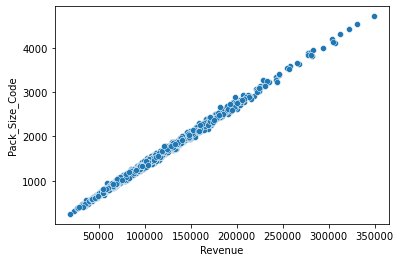

In [29]:
sns.scatterplot(data=df_all_merge, x='Revenue', y='Pack_Size_Code');

## Revenue is directly promotional to the increase in number of Pack Size

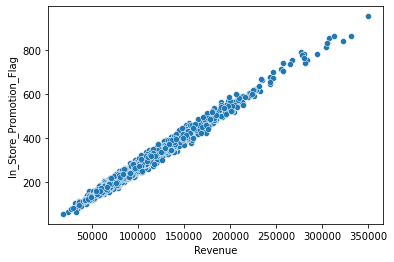

In [31]:
sns.scatterplot(data=df_all_merge, x='Revenue', y='In_Store_Promotion_Flag');
#In_Store_Promotion_Flag  Online_Promotion_Flag  Shelf_Space_Code 

## Revenue is directly promotional to the increase in in-store promotion which means the more promotion the more will be the revenue

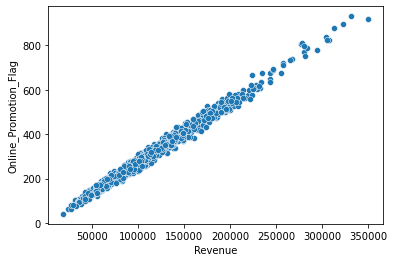

In [33]:
sns.scatterplot(data=df_all_merge, x='Revenue', y='Online_Promotion_Flag');
#    Shelf_Space_Code 

## Revenue is directly promotional to the increase in Online store promotion which means the more promotion the more will be the revenue

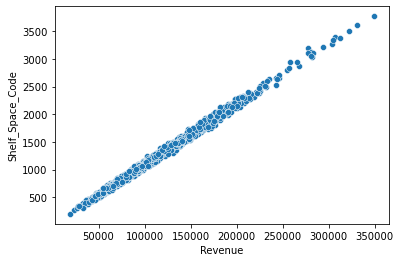

In [34]:
sns.scatterplot(data=df_all_merge, x='Revenue', y='Shelf_Space_Code');
   

## Revenue is directly promotional to the increase in Online store promotion which means the more promotion the more will be the revenue

## Corelation 

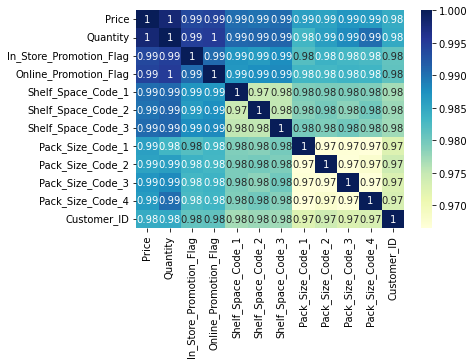

In [55]:
sns.heatmap(data=df_all_merge[['Price','Quantity','In_Store_Promotion_Flag','Online_Promotion_Flag','Shelf_Space_Code_1','Shelf_Space_Code_2','Shelf_Space_Code_3','Pack_Size_Code_1','Pack_Size_Code_2','Pack_Size_Code_3','Pack_Size_Code_4','Customer_ID']].corr(), annot=True, cmap='YlGnBu');

In [53]:
df_all_merge.head()

,InvoiceDate,Revenue,Price,Quantity,In_Store_Promotion_Flag,Online_Promotion_Flag,Pack_Size_Code_1,Pack_Size_Code_2,Pack_Size_Code_3,Pack_Size_Code_4,Shelf_Space_Code_1,Shelf_Space_Code_2,Shelf_Space_Code_3,Customer_ID
0,2019-04-20,23330,6818,442,64,65,31.0,41.0,39.0,21.0,43.0,49.0,40.0,7
1,2019-04-21,96254,27310,1873,283,273,134.0,147.0,132.0,127.0,164.0,219.0,157.0,26
2,2019-04-22,73025,20249,1418,210,183,95.0,100.0,93.0,107.0,130.0,144.0,121.0,18
3,2019-04-23,89384,25137,1704,241,234,142.0,108.0,124.0,121.0,167.0,166.0,162.0,23
4,2019-04-24,49600,13350,937,120,135,65.0,58.0,79.0,61.0,87.0,84.0,92.0,13
